In [24]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [25]:
!pip install -q tensorflow-datasets

In [26]:
import tensorflow_datasets as tfds

imdb, info = tfds.load("imdb_reviews", with_info = True, as_supervised = True)

In [27]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

In [28]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in python3 instead of just s.numpy()
for s,l in train_data:  # s, l are tensors and s.tonumpy() will extract their values 
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [18]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [19]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)  # instance of object tokenizer
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)  # replaces words with token values
padded = pad_sequences(sequences, maxlen = max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length)

In [31]:
# Define a neural network 
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length), 
                             tf.keras.layers.Flatten(), 
                             tf.keras.layers.Dense(6, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [34]:
num_epochs = 10
model.fit(padded,
          training_labels_final, 
          epochs = num_epochs,
          validation_data = (testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 4s 5ms/step - loss: 0.4823 - accuracy: 0.7552 - val_loss: 0.3474 - val_accuracy: 0.8482
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2349 - accuracy: 0.9111 - val_loss: 0.3949 - val_accuracy: 0.8264
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0888 - accuracy: 0.9772 - val_loss: 0.4485 - val_accuracy: 0.8267
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0224 - accuracy: 0.9970 - val_loss: 0.5227 - val_accuracy: 0.8238
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0053 - accuracy: 0.9998 - val_loss: 0.5873 - val_accuracy: 0.8272
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6370 - val_accuracy: 0.8269
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 8.0499e-04 - accuracy: 1.0000 - val_loss: 0.6787 - val_accuracy: 0.8277
Ep

In [35]:
# Define a neural network with global pooling instead of Flatten()
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length), 
                             tf.keras.layers.GlobalAveragePooling1D(), 
                             tf.keras.layers.Dense(6, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [36]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 102       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(padded,
          training_labels_final, 
          epochs = num_epochs,
          validation_data = (testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 4s 5ms/step - loss: 0.5589 - accuracy: 0.7166 - val_loss: 0.3886 - val_accuracy: 0.8395
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.3358 - accuracy: 0.8601 - val_loss: 0.3316 - val_accuracy: 0.8563
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2733 - accuracy: 0.8898 - val_loss: 0.3312 - val_accuracy: 0.8548
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2373 - accuracy: 0.9088 - val_loss: 0.3451 - val_accuracy: 0.8508
Epoch 5/10
782/782 [==============================] - 4s 4ms/step - loss: 0.2113 - accuracy: 0.9206 - val_loss: 0.3598 - val_accuracy: 0.8486
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1897 - accuracy: 0.9295 - val_loss: 0.3927 - val_accuracy: 0.8405
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 0.1732 - accuracy: 0.9394 - val_loss: 0.4137 - val_accuracy: 0.8379
Epoch 

In [40]:
# to visualize embeddings
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_data)

(10000, 16)


In [41]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [43]:
# write vectors to the meta data
import io

out_v = io.open('vects.tsv', 'w', encoding = 'utf-8')
out_m = io.open('meta.tsv', 'w', encoding = 'utf-8')

for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")

out_v.close()
out_m.close()

go to projector.tensorflow.org and upload meta.tsv and vects.tsv to get sphere image

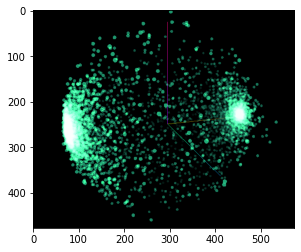

In [55]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


img = cv2.imread('/content/img.png')
plt.imshow(img, cmap='gray')